## 1. The problem statement 


## 2. Import libraries 

In [1]:
import pandas as pd  # data processing
import numpy as np   # linear algebra
import seaborn as sns # advanced data visualisation
import matplotlib.pyplot as plt #data visualisation
%matplotlib inline

from scipy import stats  
from scipy.stats import norm, skew, boxcox #statistical methodes

sns.set(style="whitegrid")

#ignoring warnings
import warnings
warnings.filterwarnings('ignore') 

#set option to display resp 200 columns and 100 rows
pd.set_option('display.max_column',200)
pd.set_option('display.max_row', 100)

## 3. Import dataset 


In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

## 4. Exploratory data analysis 


Now, I will explore the data to gain insights about the data.


### 4.1 View dimensions of dataset 

In [3]:
print('train data shape',train.shape)
print('test data shape',test.shape)

train data shape (1460, 81)
test data shape (1459, 80)


### 4.2 Preview the dataset 

In [4]:
#train set
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#test set
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


✨ Some Explorating :
  - By eyeballing the data wa could spot that we are dealing with mixed data (categorical and numeric features)
  - We have Missing Values
  - Furthermore, we can see that the numeric features have widely different ranges 


### 4.3 View summary of dataset 

In [6]:
#train.info()

✨Findings :
- We can see that the dataset contains 43 character variables and 38 numerical variables (integer & float).
- SalePrice is the target variable.
- There are a lot of missing values in the dataset. I will explore this later,

### 4.4 View statistical properties of dataset 

The above command **df.describe()** helps us to view the statistical properties of numerical variables. It excludes character variables.

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 4.5 Check the data types of columns 



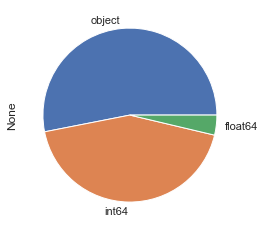

In [8]:
train.dtypes.value_counts().plot.pie()

### 4.6 Check for missing values 



In [9]:
# Precentage of NaN in the train set

def nan_percentage(data): 
    columns  = ((data.isna().sum().sort_values(ascending=False) / data.shape[0])*100 ).index
    nan_percentage = ((data.isna().sum().sort_values(ascending=False) / data.shape[0])*100).values
    return pd.DataFrame(data=nan_percentage, index=columns, columns=['nan_percentage']).T


nan_percentage(train)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,Utilities,YearRemodAdd,MSSubClass,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,RoofStyle,YearBuilt,LotConfig,OverallCond,OverallQual,HouseStyle,BldgType,Condition2,BsmtFinSF1,MSZoning,LotArea,Street,Condition1,Neighborhood,LotShape,LandContour,LandSlope,SalePrice,HeatingQC,BsmtFinSF2,EnclosedPorch,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,BsmtUnfSF,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,Functional,TotRmsAbvGrd,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,BsmtFullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,CentralAir,SaleCondition,Heating,TotalBsmtSF,Id
nan_percentage,99.520548,96.30137,93.767123,80.753425,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,5.547945,2.60274,2.60274,2.534247,2.534247,2.534247,0.547945,0.547945,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# The percentage of NaN in the test set
nan_percentage(test)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageQual,GarageYrBlt,GarageFinish,GarageType,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,MasVnrType,MasVnrArea,MSZoning,BsmtHalfBath,Utilities,Functional,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,Exterior2nd,BsmtUnfSF,TotalBsmtSF,SaleType,Exterior1st,KitchenQual,GarageArea,GarageCars,HouseStyle,LandSlope,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,BldgType,Condition1,Condition2,RoofMatl,RoofStyle,YearRemodAdd,YearBuilt,OverallCond,OverallQual,SaleCondition,Heating,ExterQual,TotRmsAbvGrd,YrSold,MoSold,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive,Fireplaces,KitchenAbvGr,ExterCond,BedroomAbvGr,HalfBath,FullBath,GrLivArea,LowQualFinSF,2ndFlrSF,1stFlrSF,Electrical,CentralAir,HeatingQC,Foundation,Id
nan_percentage,99.79438,96.504455,92.66621,80.123372,50.03427,15.558602,5.346127,5.346127,5.346127,5.346127,5.209047,3.084304,3.015764,3.015764,2.878684,2.878684,1.096642,1.028101,0.27416,0.13708,0.13708,0.13708,0.13708,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 ## 6. Handling Missing Values

Before i start handling missing values i usually want to identify what kind of missingness I am dealing with. We could classify missing values into tree categories :
- **Missing Completely at Random (MCAR)** : implies the reason from the missingness of a field is completely Random and that we probably can't predict that value from other values in the data
- **Missing At Random (MAR)** : implies that the missingness of a field can be explained by the value in other columns, but not from that column
- **Missing Not At Random (MNAR)** :implies there was a reason why the respondent didn't fill up that field and hence the data is not missing at random

⭐️ In our case we are dealing with values missing At Random (MAR) and not Missing at random (NMAR)

Based on the features' description provided with the date we have :
  - Some categorical feautures have as a class named NaN.In order to distinguish them for the the realNaN i will replace them by None  
  - All the columns listed below have Missing Values Not are random
> `Not Real Missing Values MNAR`
- **PoolQC**: Pool quality 
    - NAN menas No Pool		
- **MiscFeature** :Miscellaneous feature not covered in other categories 
   - NAN means None 
- **Alley**: Type of alley access to property -
    - NAN means No alley access
- **Fence**: Fence quality
    - NAN means NO fence
- **FireplaceQu**: Fireplace quality
    - NaN means No Fireplace
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **GarageFinish**: Interior finish of the garage
- **GarageType**: Garage location
   - NaN values Garage features mean there is NO Garage indeed
- **BsmtQual**: Evaluates the height of the basement
- **BsmtCond**: Evaluates the general condition of the basement
- **BsmtExposure**: Refers to walkout or garden level walls
- **BsmtFinType1**: Rating of basement finished area
- **BsmtFinType2**: Rating of basement finished area (if multiple types)
  - NaN means NO Basement

> `Real Missing Values`
- all the remaining NaN are MAR .i will impute them later

### 6.1 Handling Missing Values Not At Random


In [11]:
not_nan = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
           'GarageQual','GarageFinish','GarageType','BsmtQual','BsmtCond',
           'BsmtExposure','BsmtFinType1','BsmtFinType2','GarageCond']

for i in not_nan :
    train[i].fillna('None',inplace=True)
    test[i].fillna('None', inplace=True)

for i in not_nan :
    print(train[i].isna().sum(), test[i].isna().sum())


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


##### GarageYrBlt

- `GarageYrBl` : Year garage was built
- NaN in GarageYrBlt variable doesn't mean that the year when the garage was built is Missing At Random. We have only NaN in GarageYrBlt variable when FireplaceQu,GarageType, GarageFinish, GarageCars, GarageArea, GarageQual and GarageCond are all None or 0 which means that there is no Garage in the house indeed. So i will replace all the NaN by 0


In [12]:
train[train.GarageYrBlt.isna()][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,None,None,None,None,0,None,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,None,None,NaN,None,0,0,None,None,N,0,0,0,0,0,0,None,None,None,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,None,None,NaN,None,0,0,None,None,N,0,0,102,0,0,0,None,None,None,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,None,None,NaN,None,0,0,None,None,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,None,None,NaN,None,0,0,None,None,N,0,0,156,0,0,0,None,MnPrv,None,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,None,None,NaN,None,0,0,None,None,Y,0,0,0,0,0,0,None,None,None,0,8,2007,WD,Normal,123600


In [13]:
train.GarageYrBlt.fillna(0,inplace=True)
test.GarageYrBlt.fillna(0,inplace=True)

In [14]:
print(train.GarageYrBlt.isna().sum())
print(test.GarageYrBlt.isna().sum())

0
0


##### GarageCars & GarageArea

- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet



In [15]:
print(test.GarageCars.isna().sum())
print(test.GarageArea.isna().sum())

1
1


In [16]:
test[test.GarageCars.isna() & test.GarageArea.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,None,Detchd,0.0,None,NaN,NaN,None,None,Y,174,0,212,0,0,0,None,MnPrv,None,0,3,2007,WD,Alloca


In [17]:
train[train.GarageType == 'Detchd'][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
10,11,20,RL,70.0,11200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,None,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,None,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,None,None,None,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,None,GdPrv,None,0,7,2007,WD,Normal,132000


- When both GarageCars and GarageArea are missing the GarageType is mentioned that is detached from home but the Garage Condition ,Area and the year of construction are None and this doen't make sense .it's may could a typos that there is no garage in the house ...
- So to make sure that I am not going to biais the data set i will drop this row !

In [18]:
test.drop([test.index[1116]], axis=0, inplace=True)

In [19]:
print(test.GarageCars.isna().sum())
print(test.GarageArea.isna().sum())

0
0


##### BsmtFinSF1 & BsmtFinSF2 & BsmtUnfSF & TotalBsmtSF & BsmtFullBath & BsmtHalfBath

- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms

- Like GarageYBlt, all these variables mentiened above have NaN if only there is no basement in the house. So again are dealing  with NaN Missing Not At Random MNAT .I will replace the NaN by 0

In [20]:
train[(train.BsmtCond =='None') & (train.BsmtQual =='None') & (train.BsmtExposure=='None')][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,None,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,None,None,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,None,None,None,None,0,None,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,None,None,0.0,None,0,0,None,None,N,0,0,0,0,0,0,None,None,None,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,None,None,None,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,None,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,None,None,None,None,0,None,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,None,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,109500


In [21]:
bsmt_cols = ['BsmtFinSF1' ,'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF' ,'BsmtFullBath' ,'BsmtHalfBath']

for col in bsmt_cols:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)
 

In [22]:
#check if NaN are filled successfully
for col in bsmt_cols:
    print('{} in the train set has {} NaN '.format(col, train[col].isna().sum()))
    print('{} in the test set has {} NaN  '.format(col, test[col].isna().sum()))
    print('-------------')  

BsmtFinSF1 in the train set has 0 NaN 
BsmtFinSF1 in the test set has 0 NaN  
-------------
BsmtFinSF2 in the train set has 0 NaN 
BsmtFinSF2 in the test set has 0 NaN  
-------------
BsmtUnfSF in the train set has 0 NaN 
BsmtUnfSF in the test set has 0 NaN  
-------------
TotalBsmtSF in the train set has 0 NaN 
TotalBsmtSF in the test set has 0 NaN  
-------------
BsmtFullBath in the train set has 0 NaN 
BsmtFullBath in the test set has 0 NaN  
-------------
BsmtHalfBath in the train set has 0 NaN 
BsmtHalfBath in the test set has 0 NaN  
-------------


#### MasVnrType & MasVnrArea

- **MasVnrType**: Masonry veneer type
   - BrkCmn	Brick Common
   - BrkFace	Brick Face
   - CBlock	Cinder Block
   - None	None
   - Stone	Stone
	
- **MasVnrArea**: Masonry veneer area in square feet

In [23]:
print(train.MasVnrType.isna().sum())
print(train.MasVnrArea.isna().sum())

print(test.MasVnrType.isna().sum())
print(test.MasVnrArea.isna().sum())

8
8
16
15


In [24]:
train[train.MasVnrType.isna() & train.MasVnrArea.isna()][:9]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,None,None,None,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,None,None,None,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,None,None,None,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,None,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,None,None,None,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,None,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,None,None,None,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,None,None,None,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,None,None,None,0,3,2008,WD,Normal,237000


In [25]:
train[train.MasVnrType == 'None'  ][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,None,None,None,0,1,2008,WD,Normal,118000


- In variables' description they indicate that there is a None class for Masonry veneer type variable. So it seems logical that NaN in this case are typos because  when the Masonry veneer type is None also its area in square feet should be 0. 
- so i will replace the NaN in Masonry veneer type variable by None and the its equivalent area by 0

In [26]:
train.MasVnrType.fillna('None',inplace=True)
test.MasVnrType.fillna('None',inplace=True)

train.MasVnrArea.fillna(0,inplace=True)
test.MasVnrArea.fillna(0,inplace=True)

In [27]:
print(train.MasVnrType.isna().sum())
print(train.MasVnrArea.isna().sum())

print(test.MasVnrType.isna().sum())
print(test.MasVnrArea.isna().sum())

0
0
0
0


### 6.2 Handling Missing Values  At Random

#### LotFrontage :

- there are 15.55% of missing values in lotfrontage variable in both train and test data
- LotFrontage depends Neighborhood features, so I will impute the NaN in LotFrontage by the median in respect to Neighborhood feature

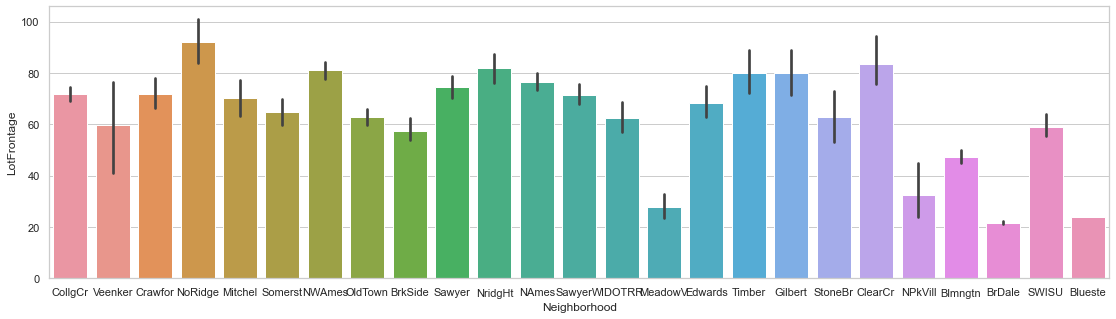

In [28]:
plt.figure(figsize=(19,5))
sns.barplot(x='Neighborhood',y='LotFrontage', data=train)

In [29]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#### MSZoning

- MSZoning should be considered to replace NaN by gruop of MSSubClass



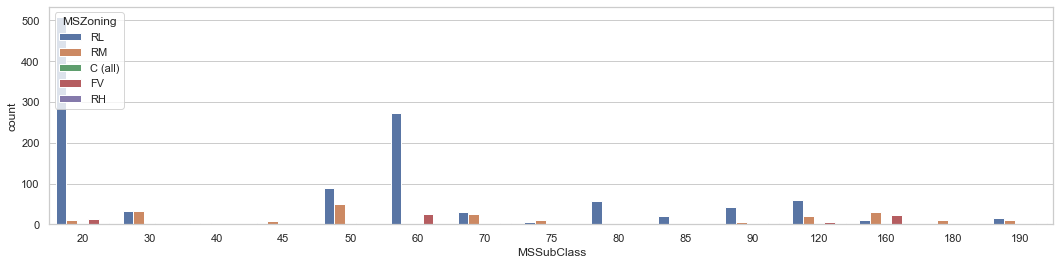

In [30]:
fig, ax = plt.subplots(1,1,figsize = (18, 4))
sns.countplot(x='MSSubClass', hue='MSZoning', data=train)

In [31]:
train['MSZoning'] = train.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))

In [32]:
train.isna().sum().sort_values(ascending=False)[:5]

Electrical     1
SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
dtype: int64

#### Electrical

In [33]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- An overwhelming majority of houses are using Standard Circuit Breakers & Romex as Electrical system. I will impute the NaN by the most frequent class 'SBrkr'

#### The remaining features

In [34]:
test.isna().sum().sort_values(ascending=False)[:10]

Utilities       2
Functional      2
Exterior2nd     1
Exterior1st     1
KitchenQual     1
SaleType        1
BsmtExposure    0
BsmtCond        0
BsmtQual        0
Foundation      0
dtype: int64

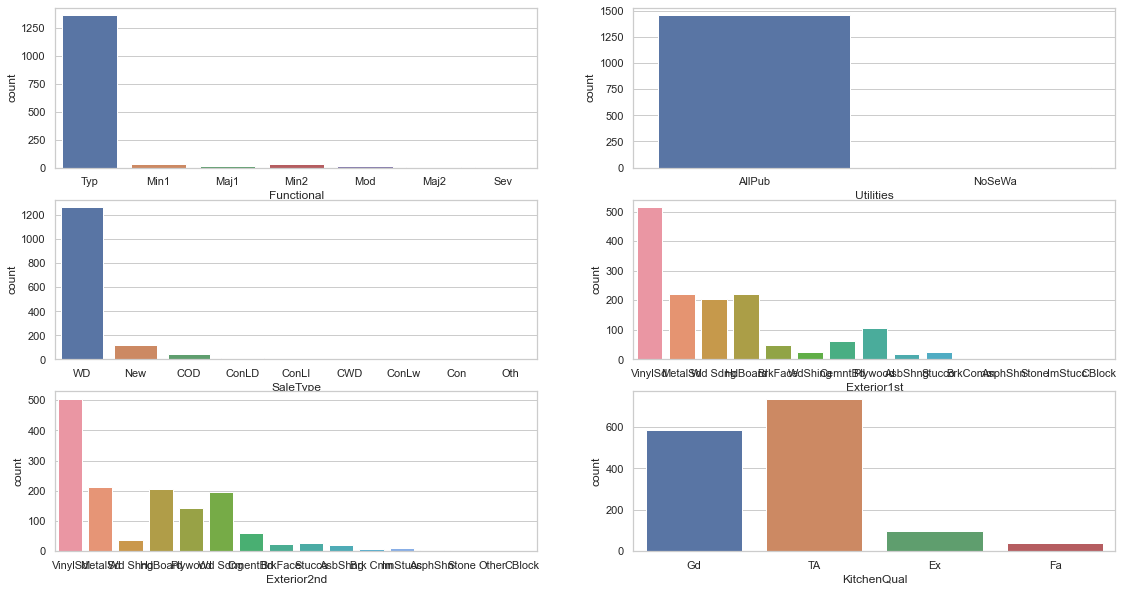

In [35]:
#plot the classes' distribution of the categorical features which have NaN
def countplot(nrows, ncols, columns, width_s,length_s):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(width_s,length_s))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.countplot(train[columns[index]],ax=ax[i][j])
            index+=1
        

remaining_nan = ['Functional','Utilities','SaleType','Exterior1st','Exterior2nd','KitchenQual']       
countplot(3, 2, remaining_nan,19,10 )

- in each variable there is an obvious unique class which is most frequency .i will impute all the remaing NaN by the most frequency classes or mode

In [36]:
remaining_NaN = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual','SaleType', 'Utilities']

for col in remaining_NaN:
    train[col].replace(np.nan, train[col].mode()[0], inplace=True)
    test[col].replace(np.nan, test[col].mode()[0], inplace=True)

## 7.  Drop irrevelant Features


In [37]:
train.drop(['Id'],axis=1, inplace=True)
test.drop(['Id'],axis=1, inplace=True)

## 8.  Contineous variables' distribution


If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance. In this case we will use Boxcox and log Transformation to transform high skewness features

### 7.1 Target variable

Skewness:  1.88
Kurtosis:  6.54


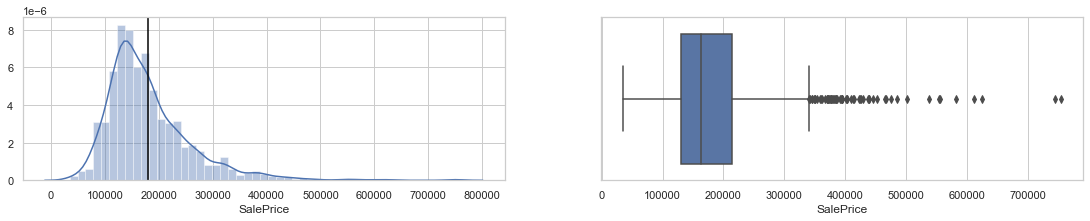

In [38]:
mean = train['SalePrice'].mean()

plt.figure(figsize=(19,3))

plt.subplot(1,2,1)
sns.distplot(train.SalePrice )
plt.axvline(mean, 0,1,color='black')

plt.subplot(1,2,2)
sns.boxplot(x='SalePrice', data=train)

print ('Skewness: ', np.round(train['SalePrice'].skew(), 2))
print ('Kurtosis: ', np.round(train['SalePrice'].kurt(), 2))

Skewness:  0.12
Kurtosis:  0.81


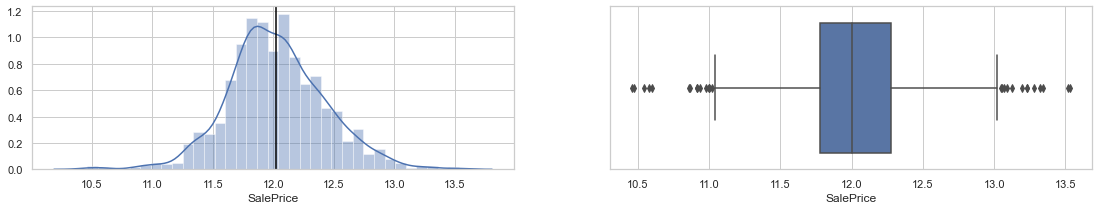

In [39]:
train['SalePrice'] = np.log(train['SalePrice'] +1)

mean = train['SalePrice'].mean()
plt.figure(figsize=(19,3))

plt.subplot(1,2,1)
sns.distplot(train.SalePrice)
plt.axvline(mean, 0,1, color = 'black')


plt.subplot(1,2,2)
sns.boxplot(x='SalePrice', data=train)

print ('Skewness: ', np.round(train['SalePrice'].skew(), 2))
print ('Kurtosis: ', np.round(train['SalePrice'].kurt(), 2))

### Removing outliers From the Target  :

- An outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean.
- I am going to use **scipy.stats.zscore()** to remove outliers from a dataframe 

In [40]:
from scipy.stats import zscore

#Removing outliers from all the columns
from scipy import stats
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


def reject_outliers(df, col):
    z_scores = stats.zscore(df.col)
    #calculate z-scores of `df`
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    new_df = df[filtered_entries]
    return new_df

In [41]:
# Remove Outliers in the target variable
train[(np.abs(stats.zscore(train['SalePrice'])) < 3)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,R

#### 7.2 Contineous features

-  based on the skew coefficient,I will transform features which don't follow Normal Distribution to have a bell shape by BoxCox method 
- A variable are perfectly normally distributed if the skew coefficient equals to 0. 
- when the skew coefficient is too high the features don't follow the normal distribution

In [42]:
num_vars = list(train.select_dtypes(exclude=object).columns)

skew_features = {}

for col in num_vars:
    skew_feature = abs(train[col].skew())
    if skew_feature > 0.50 :
        skew_features[col] = skew_feature
        train[col] = stats.boxcox(train[col]+ 1)[0]
        test[col]  = stats.boxcox(test[col]+ 1)[0]
        
skew_features

{'MSSubClass': 1.4076567471495591,
 'LotFrontage': 2.212958984987426,
 'LotArea': 12.207687851233496,
 'OverallCond': 0.6930674724842182,
 'YearBuilt': 0.613461172488183,
 'YearRemodAdd': 0.5035620027004709,
 'MasVnrArea': 2.6776164510820997,
 'BsmtFinSF1': 1.685503071910789,
 'BsmtFinSF2': 4.255261108933303,
 'BsmtUnfSF': 0.9202684528039037,
 'TotalBsmtSF': 1.5242545490627664,
 '1stFlrSF': 1.3767566220336365,
 '2ndFlrSF': 0.8130298163023265,
 'LowQualFinSF': 9.011341288465387,
 'GrLivArea': 1.3665603560164552,
 'BsmtFullBath': 0.596066609663168,
 'BsmtHalfBath': 4.103402697955168,
 'HalfBath': 0.675897448233722,
 'KitchenAbvGr': 4.488396777072859,
 'TotRmsAbvGrd': 0.6763408364355531,
 'Fireplaces': 0.6495651830548841,
 'GarageYrBlt': 3.869500821637888,
 'WoodDeckSF': 1.5413757571931312,
 'OpenPorchSF': 2.3643417403694404,
 'EnclosedPorch': 3.08987190371177,
 '3SsnPorch': 10.304342032693112,
 'ScreenPorch': 4.122213743143115,
 'PoolArea': 14.828373640750588,
 'MiscVal': 24.476794188821

## 10. Correlation Matrix For continous Feautures

- We would focus on the continous variables that are high correlated to the target variable 

In [43]:
#Filter our vars by the coef of correlation
train.corr().SalePrice.abs()[train.corr().SalePrice.abs() >=0.50].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.730240
GarageCars      0.680625
GarageArea      0.650888
YearBuilt       0.618891
TotalBsmtSF     0.612850
1stFlrSF        0.608126
FullBath        0.594771
YearRemodAdd    0.561421
TotRmsAbvGrd    0.540131
Fireplaces      0.512168
Name: SalePrice, dtype: float64

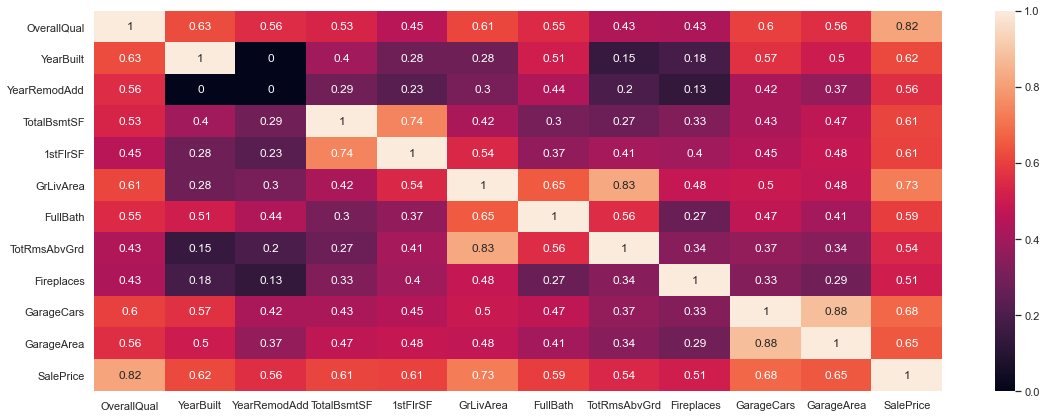

In [44]:
corr_features = train.corr().SalePrice.abs()[train.corr().SalePrice.abs() >= 0.50].index

#Correaltion matrix 
plt.figure(figsize=(19,7))
sns.heatmap(train[corr_features].corr(), annot=True)

#### 8.1 Ckeck if there is multicolinearity

>   - Multicollinearity occurs when two or more independent variables are highly correlated with one another 
  - Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable
  - This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y.
  - Multicollinearity may not affect the accuracy of our model as much. But we might lose reliability in determining the effects of individual features in our model 

- GrLivArea and TotRmsAbvGrd are highly correlated together(0.83) -----> i am going to choose GrLivArea bc it s highly correlated with the target than TotRmsAbvGrd
- GarageCars and GarageArea are highly correlated together (0.88)  -----> I m going to choose GarageCars for the same reason


In [45]:
train.drop(['TotRmsAbvGrd','GarageArea'], axis=1, inplace=True)
test.drop(['TotRmsAbvGrd','GarageArea'], axis=1, inplace=True)

🌟 Only Linear regression algorithms like (LinearRegression(), Lasso() ..) assume that the input data are normaly distributed and there is no multicollinearity between the independent variables. Others like trees algorithms have no assumptions about how the input data should be so they are capable to handle complex data 


### Visualisation of the Linear Relationship 

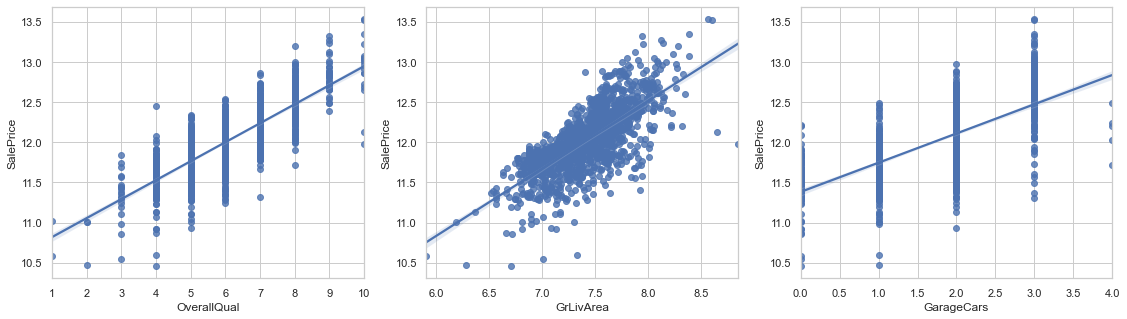

In [46]:
more_corr_features = ['OverallQual','GrLivArea','GarageCars' ]  

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(19,5))
sns.regplot(x="OverallQual", y="SalePrice", data=train, ax=ax1)
sns.regplot(x="GrLivArea", y="SalePrice", data=train, ax=ax2)
sns.regplot(x="GarageCars", y="SalePrice", data=train, ax=ax3)

## 11. Encoding Categorical variables


In [47]:
cat_vars = list(train.select_dtypes(include=object).columns)

In [48]:
train_dummy = pd.get_dummies(train[cat_vars], drop_first=True)
train_dummy.head(3)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,

In [49]:
#drop categorical features in train set
train.drop(cat_vars, inplace=True, axis=1)

In [50]:
train = pd.concat([train,train_dummy], axis=1)
train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.661927,12.552990,10.427530,7,2.235408,5.219183e+71,2.572317e+132,2.967319,15.235368,0.0,20.452663,198.284295,5.219622,4.527843,0.0,7.600483,0.425418,0.000000,2,0.352122,3,0.390035,0.000000,2.236535e+07,2,0.000000,4.227899,0.0,0.0,0.0,0.0,0.0,2,2008,12.247699,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2.191299,13.990554,10.596444,6,2.888050,3.865883e+71,1.483257e+132,0.000000,16.750863,0.0,28.330978,264.601145,5.442275,0.000000,0.0,7.284379,0.000000,0.039486,2,0.000000,3,0.390035,0.607742,2.166732e+07,2,4.594581,0.000000,0.0,0.0,0.0,0.0,0.0,5,2007,12.109016,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

## 12. Splitting the data into train and test set

In [51]:
X = train.drop(['SalePrice'],axis=1)
y = train.SalePrice

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (1168, 257)
X_test : (292, 257)
y_train : (1168,)
y_test : (292,)


## 13.Feature Scaling 

In [53]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = MinMaxScaler()

X_train_n = sc.fit_transform(X_train)
X_test_n  = sc.transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train_n, columns=X.columns)
X_test = pd.DataFrame(X_test_n, columns=X.columns)

In [55]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.386356,0.410653,0.888889,0.640175,0.959002,0.916902,0.928672,0.295935,0.0,0.910426,0.657643,0.765880,0.0,0.0,0.642184,0.000000,0.0,0.666667,0.0,0.375,0.783464,0.566850,0.996516,0.75,0.000000,0.736883,0.000000,0.0,0.999999,0.0,0.0,0.545455,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.251326,0.301010,0.444444,0.640175,

## Random Forest Regressor model with default parameters

In [56]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestRegressor

# instantiate the classifier 
rfr = RandomForestRegressor(random_state=0)

# fit the model
rfr.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfr.predict(X_test)

# Check accuracy score 
from sklearn.metrics import r2_score

print('Model R2_score with 10 decision-trees : {0:0.4f}'. format(r2_score(y_test, y_pred)))

Model R2_score with 10 decision-trees : 0.8764


## 11. Feature Selection with Random Forest model 

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

In [57]:
# create the classifier with n_estimators = 100
rgf = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set
rgf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [58]:
##view the feature scores
feature_scores = pd.Series(rgf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

OverallQual        0.539025
GrLivArea          0.114316
GarageCars         0.053299
TotalBsmtSF        0.050888
1stFlrSF           0.022701
                     ...   
Functional_Sev     0.000000
Condition2_RRNn    0.000000
HeatingQC_Po       0.000000
Foundation_Wood    0.000000
Condition2_RRAn    0.000000
Length: 257, dtype: float64

In [59]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(21,44))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

💥Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ).

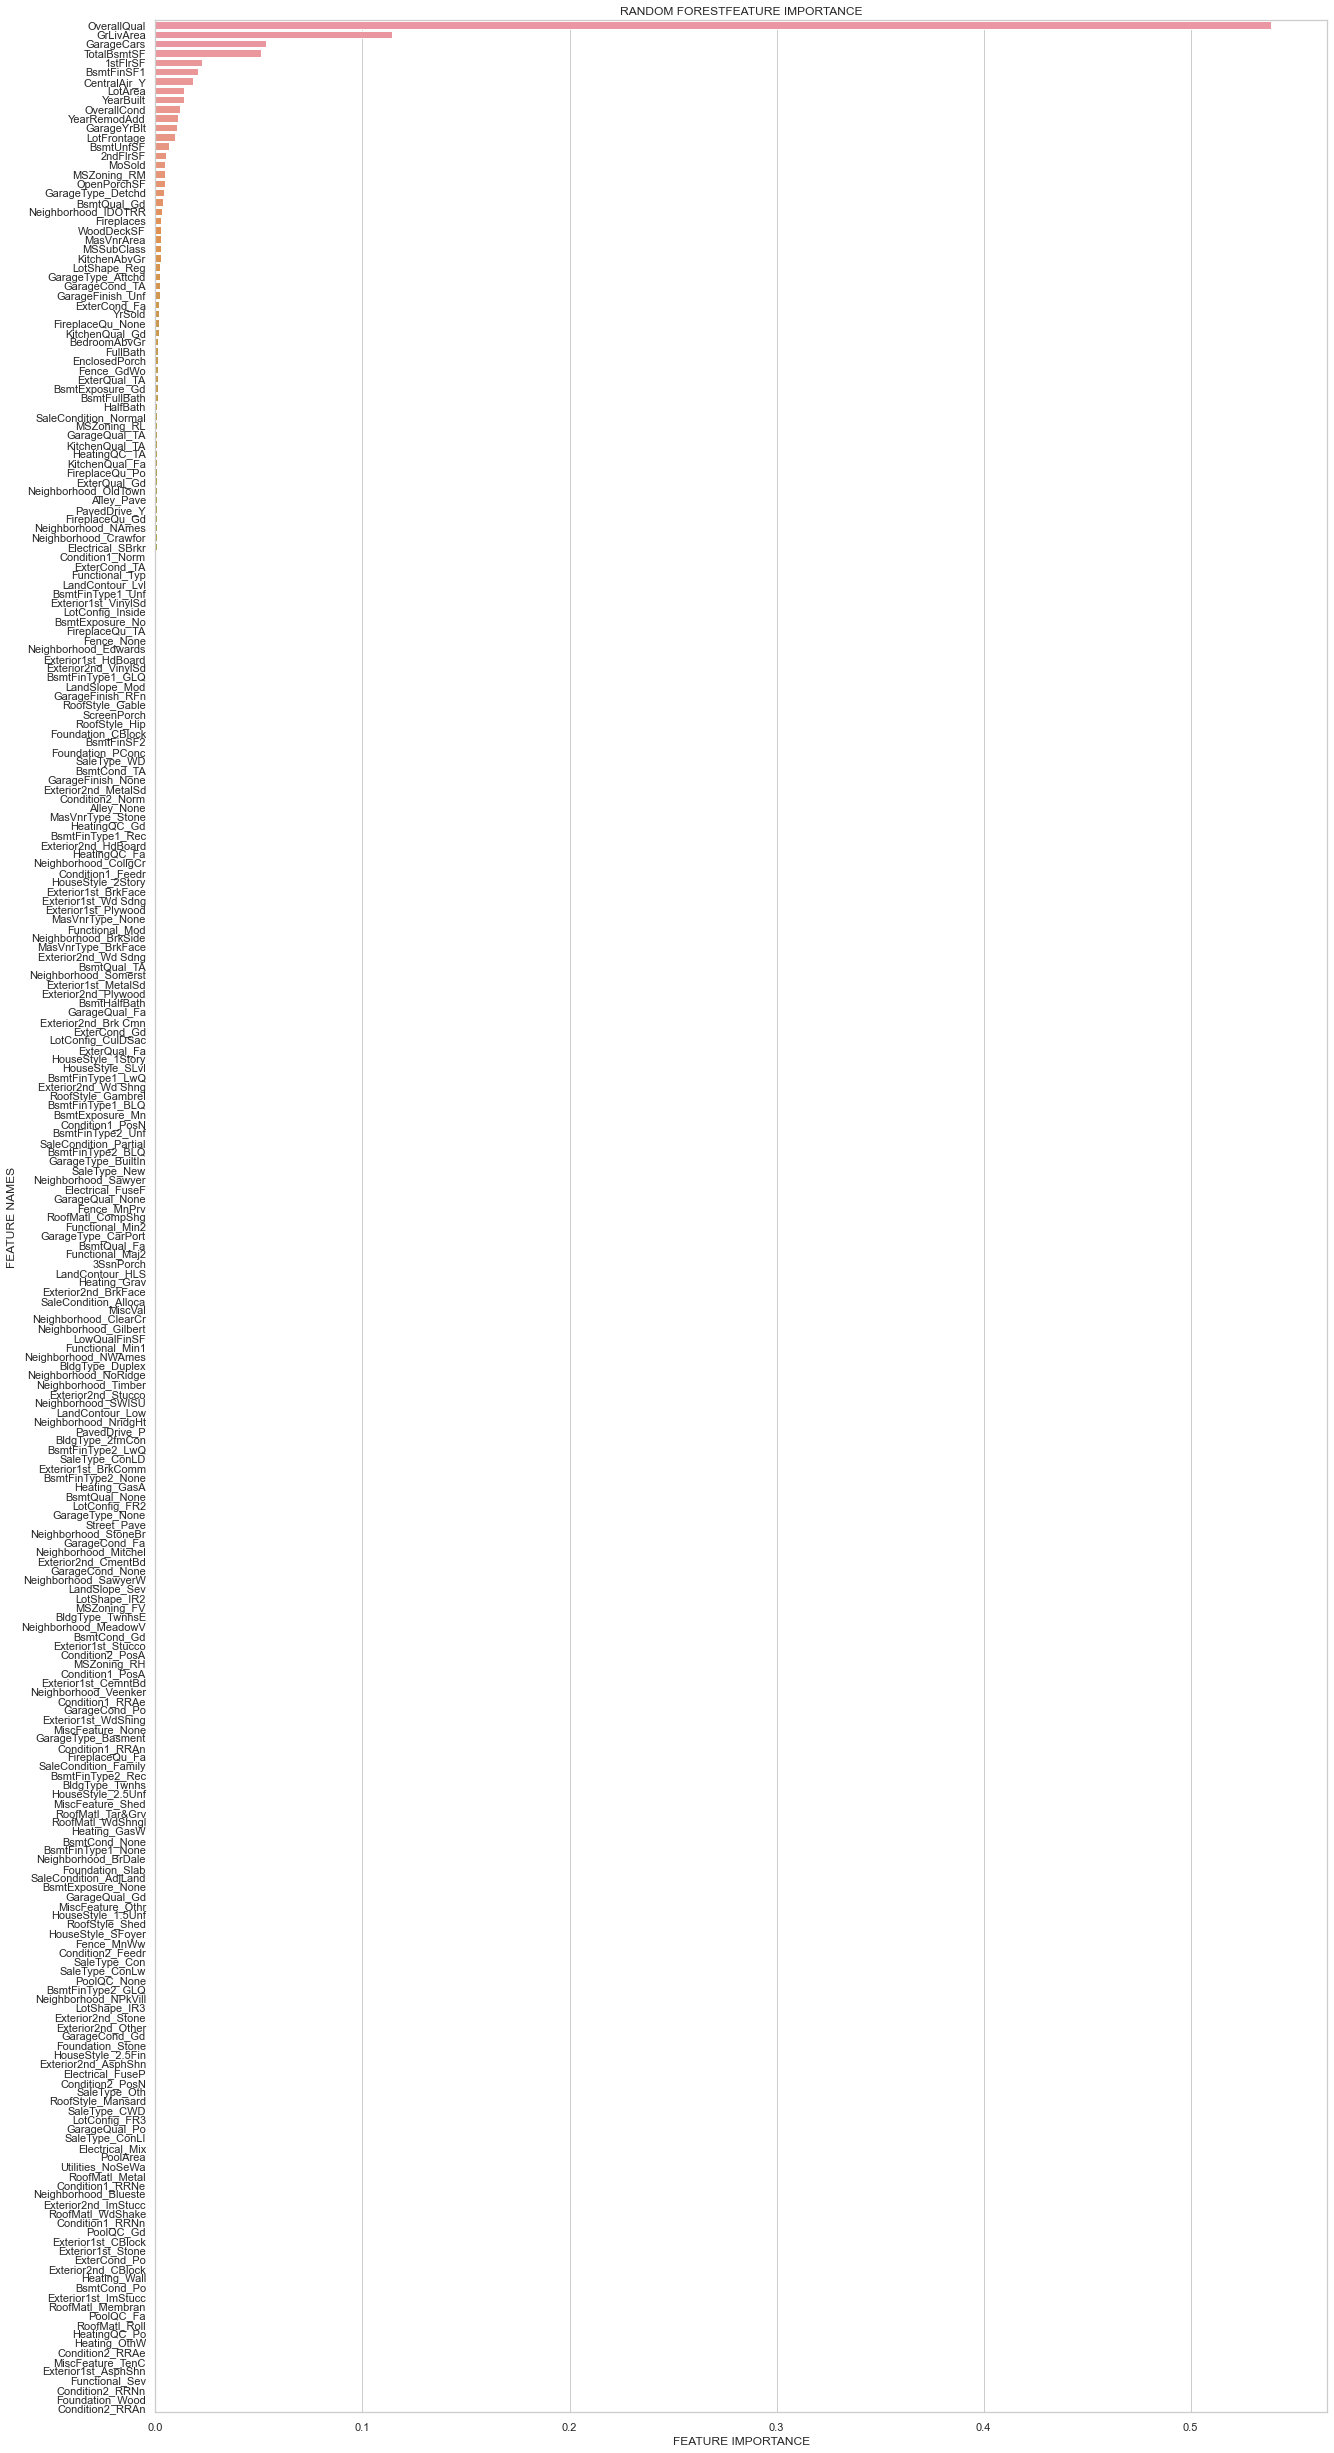

In [60]:
plot_feature_importance(rgf.feature_importances_,X_train.columns,'RANDOM FOREST')

In [98]:
#Select the top 15 important features
imp_features = feature_scores[:15].index

In [99]:
X_train_f = X_train[imp_features]
X_test_f = X_test[imp_features]

## Build the Random Forest model on selected features

In [100]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestRegressor

# instantiate the classifier 
RFR_model = RandomForestRegressor(random_state=0)

# fit the model
RFR_model.fit(X_train_f, y_train)

# Predict the Test set results
y_pred = RFR_model.predict(X_test_f)

# Check accuracy score 
from sklearn.metrics import r2_score

print('Model R2_score with 10 decision-trees : {0:0.4f}'. format(r2_score(y_test, y_pred)))

Model R2_score with 10 decision-trees : 0.8805


💫 **So, we can see that the model R2_score has been improved for 0.8764 to 0.8805** 

## Create some handy functions

In [64]:
from sklearn.model_selection import cross_val_score, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def model_val_scores(mod, X_train, y_train):
        
    score_val = []
    standard_deviation = []
        
    scores = cross_val_score(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    rmse_scores = np.sqrt(-scores)
    scores_mean = rmse_scores.mean()
    scores_std = rmse_scores.std()
        
    score_val.append(scores_mean)
    standard_deviation.append(scores_std)
    
    return pd.DataFrame(data=[score_val, standard_deviation], index = ['scores_val', 'scores_std']) 


def learning_curves(mod, X_train, y_train ):
    
    N , train_score, val_score = learning_curve(mod, X_train, y_train,  cv=5 , train_sizes=np.linspace(0.2 ,1.0, 5))

    plt.plot(N, train_score.mean(axis=1), label='Train')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.xlabel('train size')
    plt.legend()
    

def GridSearchCV_(mod, param_grid, X_train, y_train):
    grid = GridSearchCV(estimator=mod, param_grid=param_grid, cv= 5, scoring='neg_mean_squared_error')
    
    grid.fit(X_train, y_train)
    model_best_params = grid.best_estimator_
    
    print('best score :', grid.best_score_ )
    print('best params :', grid.best_params_ )
    
    return model_best_params


def performance_metrics(y_test, y_pred):
    
    r2_scores  = []
    mae_value  = []
    mse_value  = []
    rmse_value = []
   
    scores = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    r2_scores.append(scores)
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    
    metrics_dataframe=pd.DataFrame(data= [r2_scores, mae_value, mse_value, rmse_value],
                                index=['r2_score','MAE','MSE','RMSE'])
    return metrics_dataframe.T

## Learning Curve

In [65]:
from sklearn.ensemble import RandomForestRegressor

model_val_scores(RFR_model, X_train_f, y_train)

,0
scores_val,0.146368
scores_std,0.020478


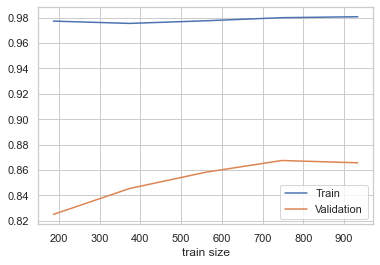

In [66]:
learning_curves(RFR_model, X_train_f, y_train)

## Tunning Hyperparameters  :


In [67]:
RFR_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [68]:
param_grid = {'max_depth':np.arange(10, 40, 5),
             'n_estimators':np.arange(100, 300, 50)}

RFR_model_best_params = GridSearchCV_(RFR_model, param_grid , X_train_f, y_train)

best score : -0.021552138236381385
best params : {'max_depth': 20, 'n_estimators': 250}


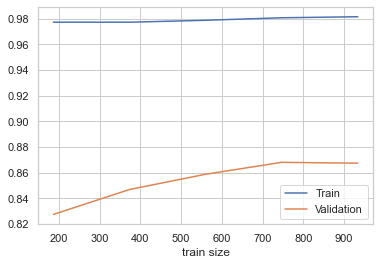

In [69]:
learning_curves(RFR_model_best_params, X_train_f, y_train)

In [70]:
RFR_model_best_params.fit(X_train_f, y_train)

y_pred_rf = RFR_model_best_params.predict(X_test_f)

## Evaluate the model with different Metrics

In [71]:
performance_metrics(y_test, y_pred_rf)

,r2_score,MAE,MSE,RMSE
0,0.880134,0.093793,0.018147,0.134712


### Erros' distribution

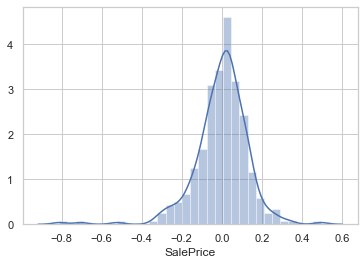

In [73]:
sns.distplot(y_test-y_pred_rf)